In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [ ]:
import os

In [ ]:
os.getcwd()

'C:\\Users\\amjur\\Desktop\\PG_Machine Learning\\project'

In [ ]:
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('Election_Data.xlsx', sheet_name = 'Election_Dataset_Two Classes')
df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [ ]:
df.shape

(1525, 10)

In [ ]:
data = df.drop('Unnamed: 0', axis = 1)
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [ ]:
data.shape

(1525, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [ ]:
data.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [ ]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        print(feature)
        print(data[feature].value_counts())
        print('\n')


vote
Labour          1063
Conservative     462
Name: vote, dtype: int64


gender
female    812
male      713
Name: gender, dtype: int64




In [ ]:
data.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [ ]:
data.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

## Descriptive Statistics

In [ ]:
print('data:',data.mean())

data: age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64


In [ ]:
print('data:',data.median())

data: age                        53.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64


### almost mean and median are equal

In [ ]:
print(data['age'].mode())

0    37
dtype: int64


In [ ]:
print(data['economic.cond.national'].mode())

0    3
dtype: int64


In [ ]:
print(data['economic.cond.household'].mode())

0    3
dtype: int64


In [ ]:
print(data['Blair'].mode())

0    4
dtype: int64


In [ ]:
print(data['Hague'].mode())

0    2
dtype: int64


In [ ]:
print(data['Europe'].mode())

0    11
dtype: int64


In [ ]:
print(data['political.knowledge'].mode())

0    2
dtype: int64


In [ ]:
print('data_quantile(25%):',data.quantile(q=0.25)) #Prints the value below which 25% of the data lies

data_quantile(25%): age                        41.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       2.0
Hague                       2.0
Europe                      4.0
political.knowledge         0.0
Name: 0.25, dtype: float64


In [ ]:
print('data_quantile(50%):',data.quantile(q=0.5)) #Prints the value below which 50% of the data lies

data_quantile(50%): age                        53.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
Name: 0.5, dtype: float64


In [ ]:
print('data_quantile(75%):',data.quantile(q=0.75)) #Prints the value below which 75% of the data lies

data_quantile(75%): age                        67.0
economic.cond.national      4.0
economic.cond.household     4.0
Blair                       4.0
Hague                       4.0
Europe                     10.0
political.knowledge         2.0
Name: 0.75, dtype: float64


## Plotting the summary mean,mode,median using histogram

In [ ]:
mean = data['age'].mean()
median = data['age'].median()
mode = data['age'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])


Mean:  54.18229508196721 
Median:  53.0 
Mode:  37


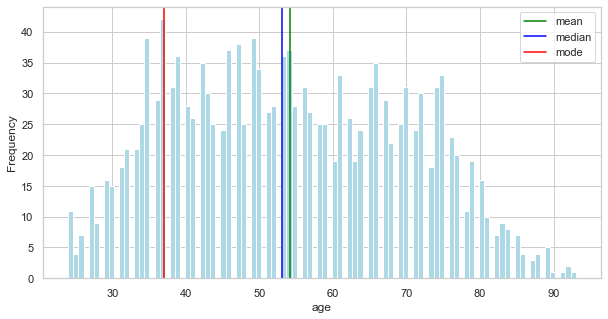

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['age'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('age')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [ ]:
mean = data['economic.cond.national'].mean()
median = data['economic.cond.national'].median()
mode = data['economic.cond.national'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])


Mean:  3.2459016393442623 
Median:  3.0 
Mode:  3


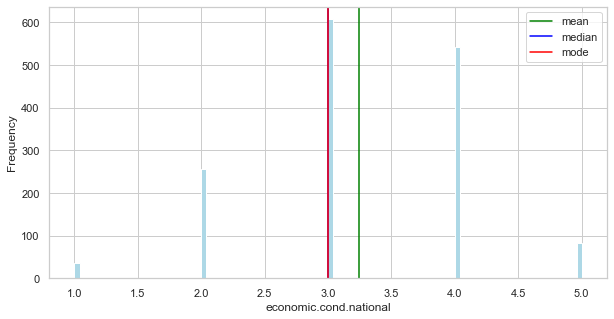

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['economic.cond.national'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('economic.cond.national')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [ ]:
mean = data['economic.cond.household'].mean()
median = data['economic.cond.household'].median()
mode = data['economic.cond.household'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])


Mean:  3.140327868852459 
Median:  3.0 
Mode:  3


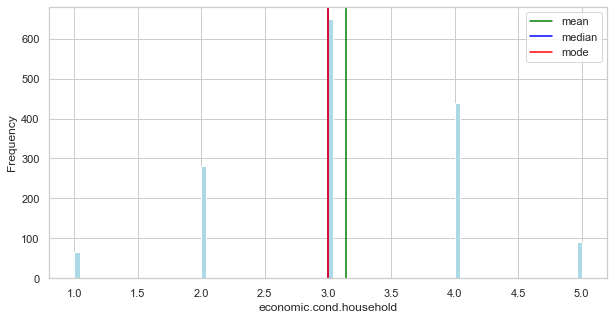

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['economic.cond.household'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('economic.cond.household')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [ ]:
mean = data['Blair'].mean()
median = data['Blair'].median()
mode = data['Blair'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])


Mean:  3.3344262295081966 
Median:  4.0 
Mode:  4


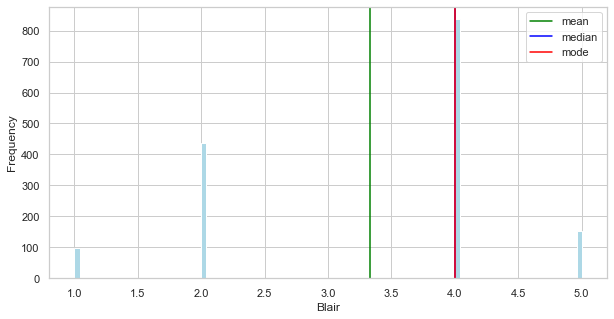

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['Blair'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('Blair')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [ ]:
mean = data['Hague'].mean()
median = data['Hague'].median()
mode = data['Hague'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])


Mean:  2.7468852459016393 
Median:  2.0 
Mode:  2


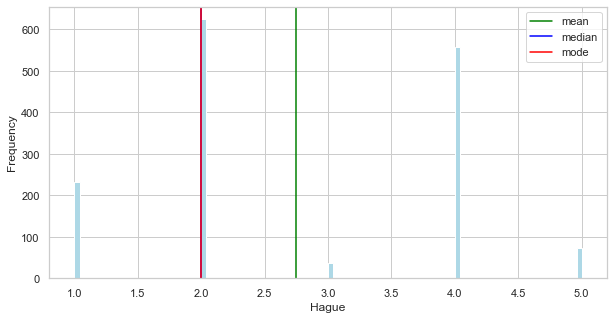

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['Hague'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('Hague')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [ ]:
mean = data['Europe'].mean()
median = data['Europe'].median()
mode = data['Europe'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])


Mean:  6.728524590163935 
Median:  6.0 
Mode:  11


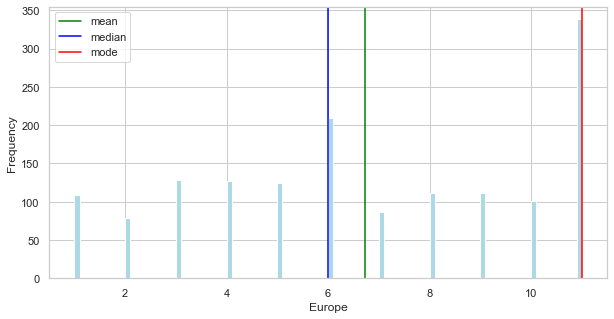

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['Europe'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('Europe')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [ ]:
mean = data['political.knowledge'].mean()
median = data['political.knowledge'].median()
mode = data['political.knowledge'].mode()
print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

Mean:  1.5422950819672132 
Median:  2.0 
Mode:  2


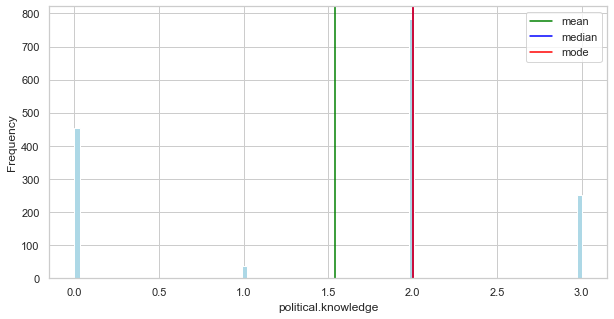

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['political.knowledge'],bins=100,color='lightblue') #plot histogram


# draw lines for mean,mode,median

plt.axvline(mean,color='green',label='mean')
plt.axvline(median,color='blue',label='median')
plt.axvline(mode[0],color='red',label='mode')


# label x axis

plt.xlabel('political.knowledge')

# label y axis

plt.ylabel('Frequency')

# plot legend

plt.legend()

plt.show()

In [ ]:
data['age'].quantile(0.75)-data['age'].quantile(0.25)

26.0

<AxesSubplot:>

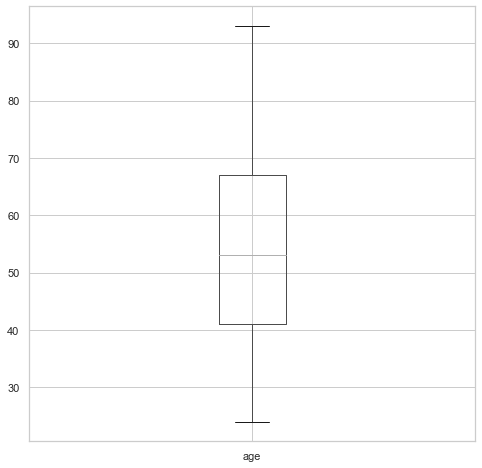

In [ ]:
data.boxplot(column='age',return_type='axes',figsize=(8,8))

In [ ]:
data['economic.cond.national'].quantile(0.75)-data['economic.cond.national'].quantile(0.25)

1.0

<AxesSubplot:>

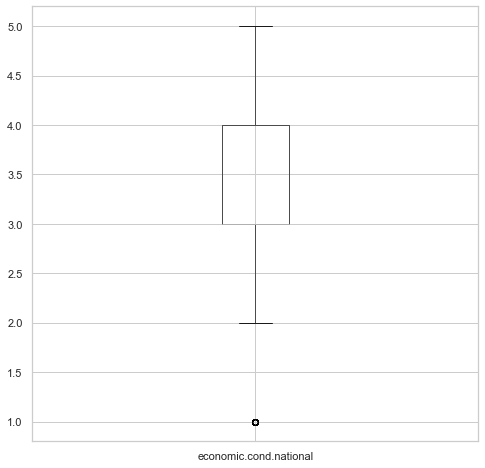

In [ ]:
data.boxplot(column='economic.cond.national',return_type='axes',figsize=(8,8))

In [ ]:
data['economic.cond.household'].quantile(0.75)-data['economic.cond.household'].quantile(0.25)

1.0

<AxesSubplot:>

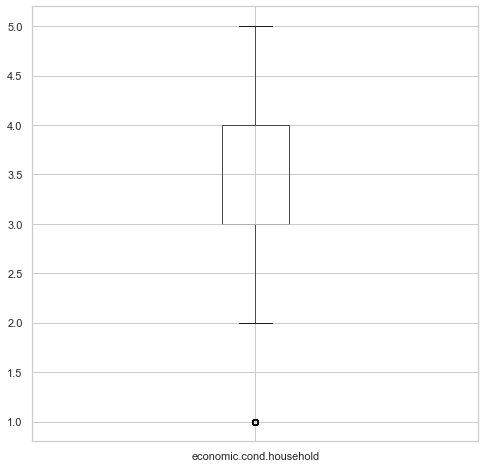

In [ ]:
data.boxplot(column='economic.cond.household',return_type='axes',figsize=(8,8))

In [ ]:
data['Blair'].quantile(0.75)-data['Blair'].quantile(0.25)

2.0

<AxesSubplot:>

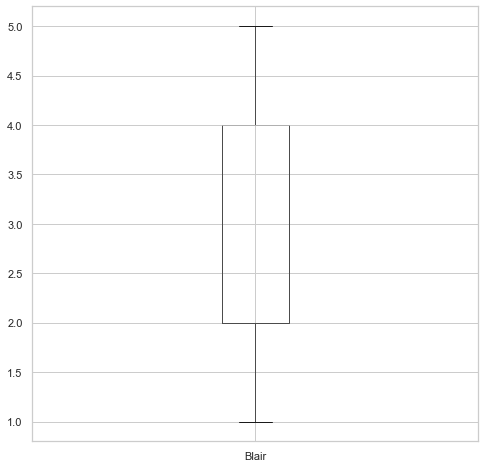

In [ ]:
data.boxplot(column='Blair',return_type='axes',figsize=(8,8))

In [ ]:
data['Hague'].quantile(0.75)-data['Hague'].quantile(0.25)

2.0

<AxesSubplot:>

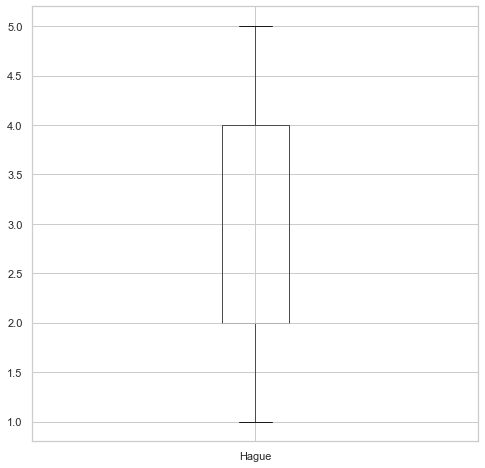

In [ ]:
data.boxplot(column='Hague',return_type='axes',figsize=(8,8))

In [ ]:
data['Europe'].quantile(0.75)-data['Europe'].quantile(0.25)

6.0

<AxesSubplot:>

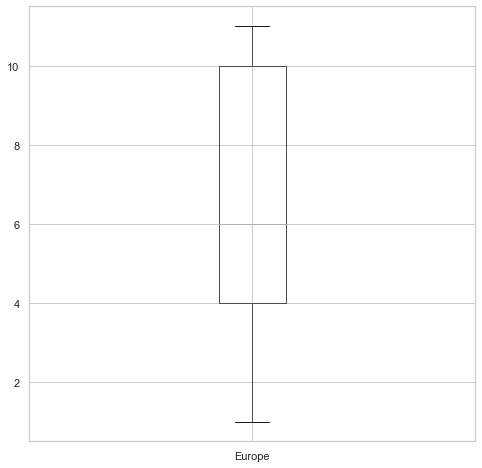

In [ ]:
data.boxplot(column='Europe',return_type='axes',figsize=(8,8))

In [ ]:
data['political.knowledge'].quantile(0.75)-data['political.knowledge'].quantile(0.25)

2.0

<AxesSubplot:>

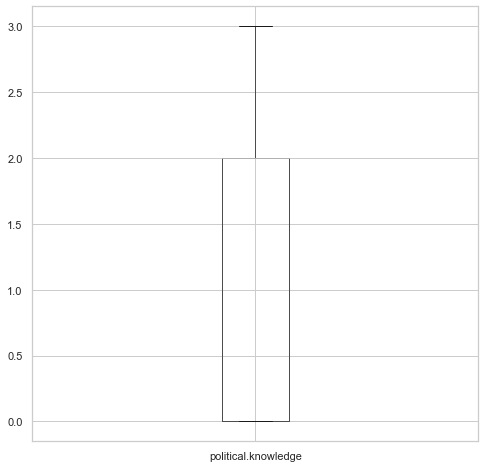

In [ ]:
data.boxplot(column='political.knowledge',return_type='axes',figsize=(8,8))

## Measures of Dispersion

In [ ]:
### IQR

In [ ]:
data['age'].quantile(0.75)-data['age'].quantile(0.25)

26.0

In [ ]:
data['economic.cond.national'].quantile(0.75)-data['economic.cond.national'].quantile(0.25)

1.0

In [ ]:
data['economic.cond.household'].quantile(0.75)-data['economic.cond.household'].quantile(0.25)

1.0

In [ ]:
data['Blair'].quantile(0.75)-data['Blair'].quantile(0.25)

2.0

In [ ]:
data['Hague'].quantile(0.75)-data['Hague'].quantile(0.25)

2.0

In [ ]:
data['Europe'].quantile(0.75)-data['Europe'].quantile(0.25)

6.0

In [ ]:
data['political.knowledge'].quantile(0.75)-data['political.knowledge'].quantile(0.25)

2.0

In [ ]:
### Range

In [ ]:
data['age'].max()-data['age'].min()

69

In [ ]:
data['economic.cond.national'].max()-data['economic.cond.national'].min()

4

In [ ]:
data['economic.cond.household'].max()-data['economic.cond.household'].min()

4

In [ ]:
data['Blair'].max()-data['Blair'].min()

4

In [ ]:
data['Hague'].max()-data['Hague'].min()

4

In [ ]:
data['Europe'].max()-data['Europe'].min()

10

In [ ]:
data['political.knowledge'].max()-data['political.knowledge'].min()

3

In [ ]:
### Variance

In [ ]:
data.var()

age                        246.842075
economic.cond.national       0.776107
economic.cond.household      0.864810
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
dtype: float64

In [ ]:
### standard deviation

In [ ]:
data.std()

age                        15.711209
economic.cond.national      0.880969
economic.cond.household     0.929951
Blair                       1.174824
Hague                       1.230703
Europe                      3.297538
political.knowledge         1.083315
dtype: float64

In [ ]:
data.cov() #Prints the covariance of each attribute against every other attribute

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,246.842075,0.256981,-0.607619,0.557762,0.669531,3.568550,-0.825301
economic.cond.national,0.256981,0.776107,0.283712,0.338314,-0.216589,-0.608397,-0.022546
economic.cond.household,-0.607619,0.283712,0.864810,0.235192,-0.116689,-0.352299,-0.038091
Blair,0.557762,0.338314,0.235192,1.380212,-0.351648,-1.147341,-0.026621
Hague,0.669531,-0.216589,-0.116689,-0.351648,1.514631,1.166149,-0.040469
Europe,3.568550,-0.608397,-0.352299,-1.147341,1.166149,10.873759,-0.544285
political.knowledge,-0.825301,-0.022546,-0.038091,-0.026621,-0.040469,-0.544285,1.173571


In [ ]:
data.corr() # prints the correlation coefficient between every pair of attributes

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


In [ ]:
data.skew() #to measure the skeweness of every attribute

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [ ]:
import scipy.stats as stats


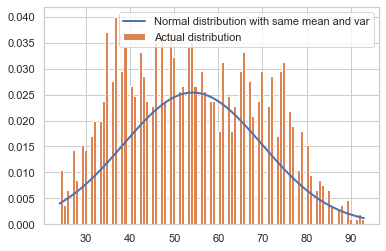

In [ ]:
#convert pandas DataFrame object to numpy array and sort

h = np.asarray(data['age'])
h = sorted(h)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h, np.mean(h), np.std(h))

#plot both series on the histogram

plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2
plt.legend()
plt.show()

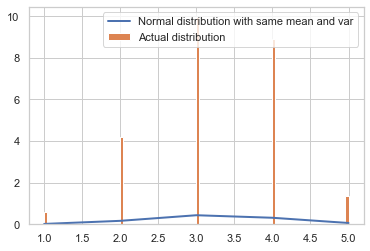

In [ ]:
h1 = np.asarray(data['economic.cond.national'])
h1 = sorted(h1)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h1, np.mean(h1), np.std(h1))

#plot both series on the histogram

plt.plot(h1,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h1,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2
plt.legend()
plt.show()

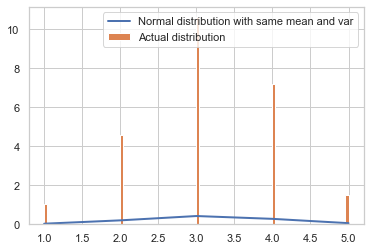

In [ ]:
h2 = np.asarray(data['economic.cond.household'])
h2 = sorted(h2)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h2, np.mean(h2), np.std(h2))

#plot both series on the histogram

plt.plot(h2,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h2,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2
plt.legend()
plt.show()

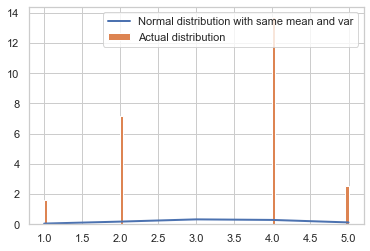

In [ ]:
h3 = np.asarray(data['Blair'])
h3 = sorted(h3)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h3, np.mean(h3), np.std(h3))

#plot both series on the histogram

plt.plot(h3,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h3,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2
plt.legend()
plt.show()

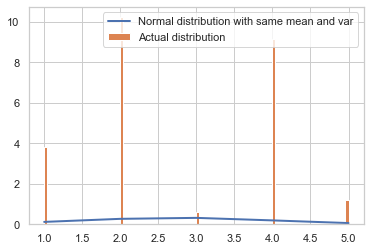

In [ ]:
h4 = np.asarray(data['Hague'])
h4 = sorted(h4)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h4, np.mean(h4), np.std(h4))

#plot both series on the histogram

plt.plot(h4,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h4,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2
plt.legend()
plt.show()

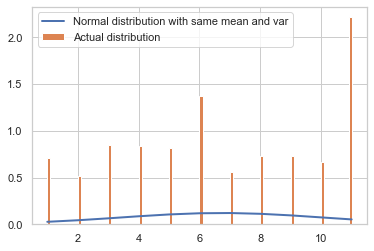

In [ ]:
h6 = np.asarray(data['Europe'])
h6 = sorted(h6)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h6, np.mean(h6), np.std(h6))

#plot both series on the histogram

plt.plot(h6,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h6,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2
plt.legend()
plt.show()

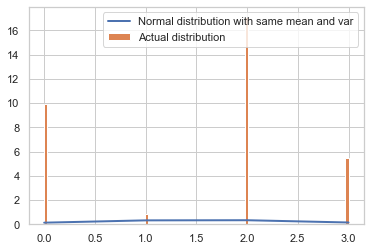

In [ ]:
h7 = np.asarray(data['political.knowledge'])
h7 = sorted(h7)

#use the scipy stats module to fit a normal distirbution with same mean and standard deviation

fit = stats.norm.pdf(h7, np.mean(h7), np.std(h7))

#plot both series on the histogram

plt.plot(h7,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h7,density=True,bins = 100,label="Actual distribution")     #normed is used instead of density in python2
plt.legend()
plt.show()

In [ ]:
data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [ ]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


In [ ]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [ ]:
data[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [ ]:
## unique values for categorical variables

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [ ]:
## Univariate Analysis

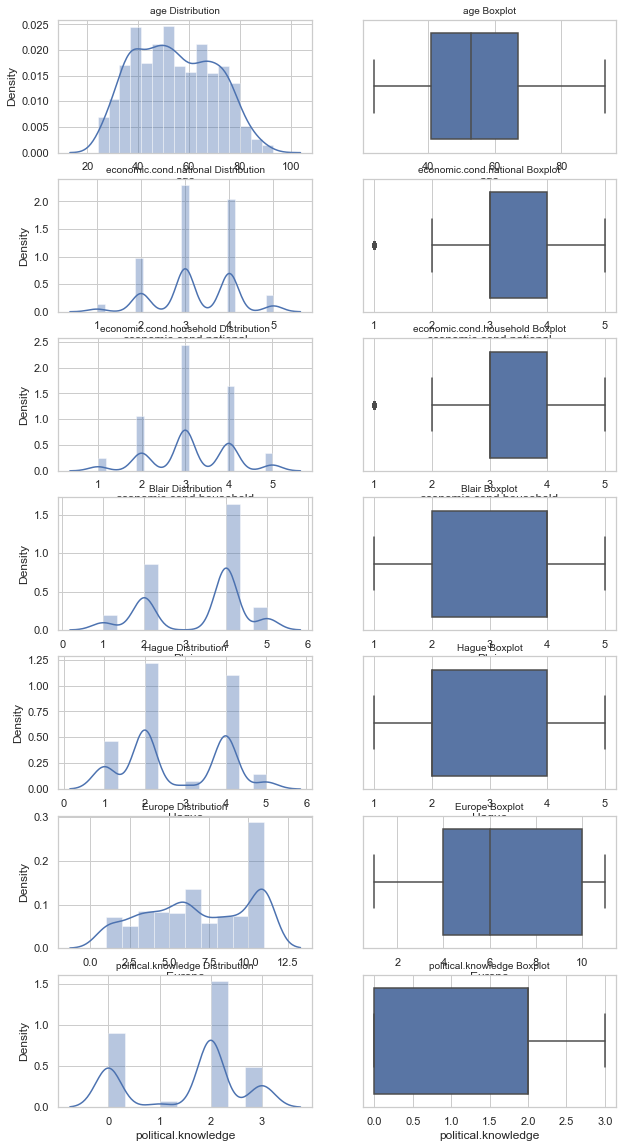

In [ ]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(data['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(data['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(data['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(data['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(data['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(data['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(data['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(data['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(data['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(data['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(data['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(data['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(data['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(data['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge Boxplot",fontsize=10)


plt.show()

In [ ]:
# Bivariate and multivariate analysis

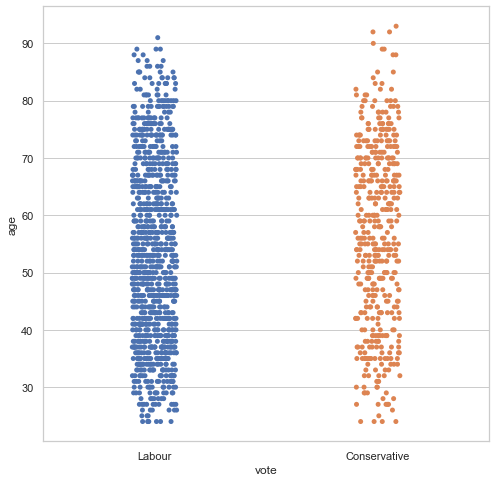

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(data["vote"], data['age'], jitter=True)
plt.show()

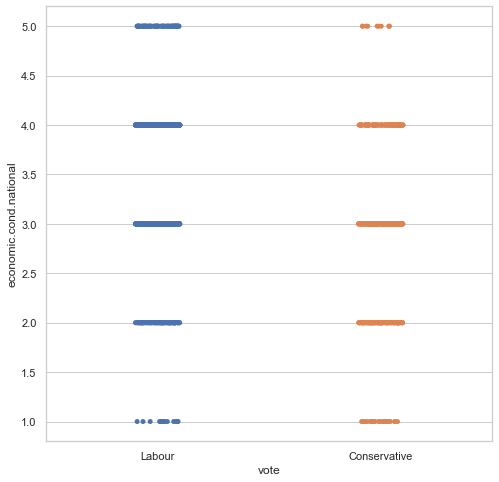

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(data["vote"], data['economic.cond.national'], jitter=True)
plt.show()

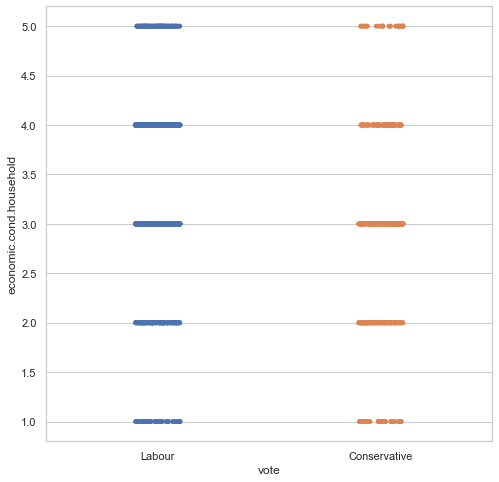

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(data["vote"], data['economic.cond.household'], jitter=True)
plt.show()

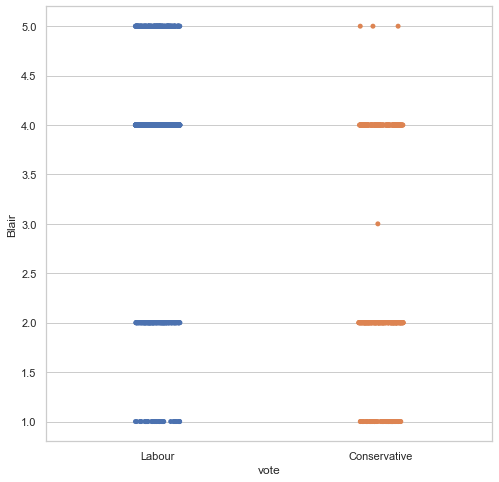

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(data["vote"], data['Blair'], jitter=True)
plt.show()

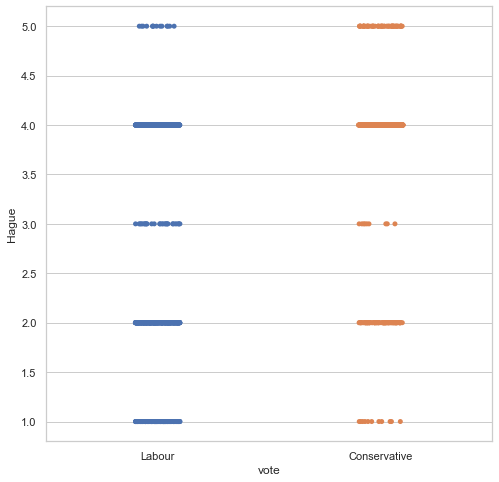

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(data["vote"], data['Hague'], jitter=True)
plt.show()

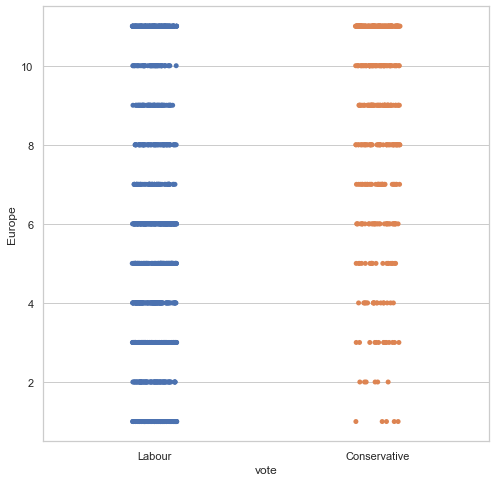

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(data["vote"], data['Europe'], jitter=True)
plt.show()

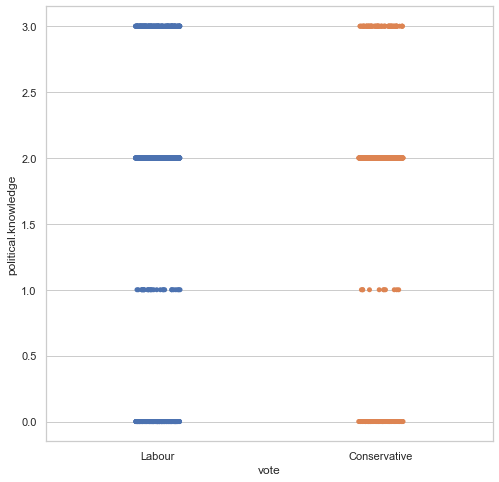

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(data["vote"], data['political.knowledge'], jitter=True)
plt.show()

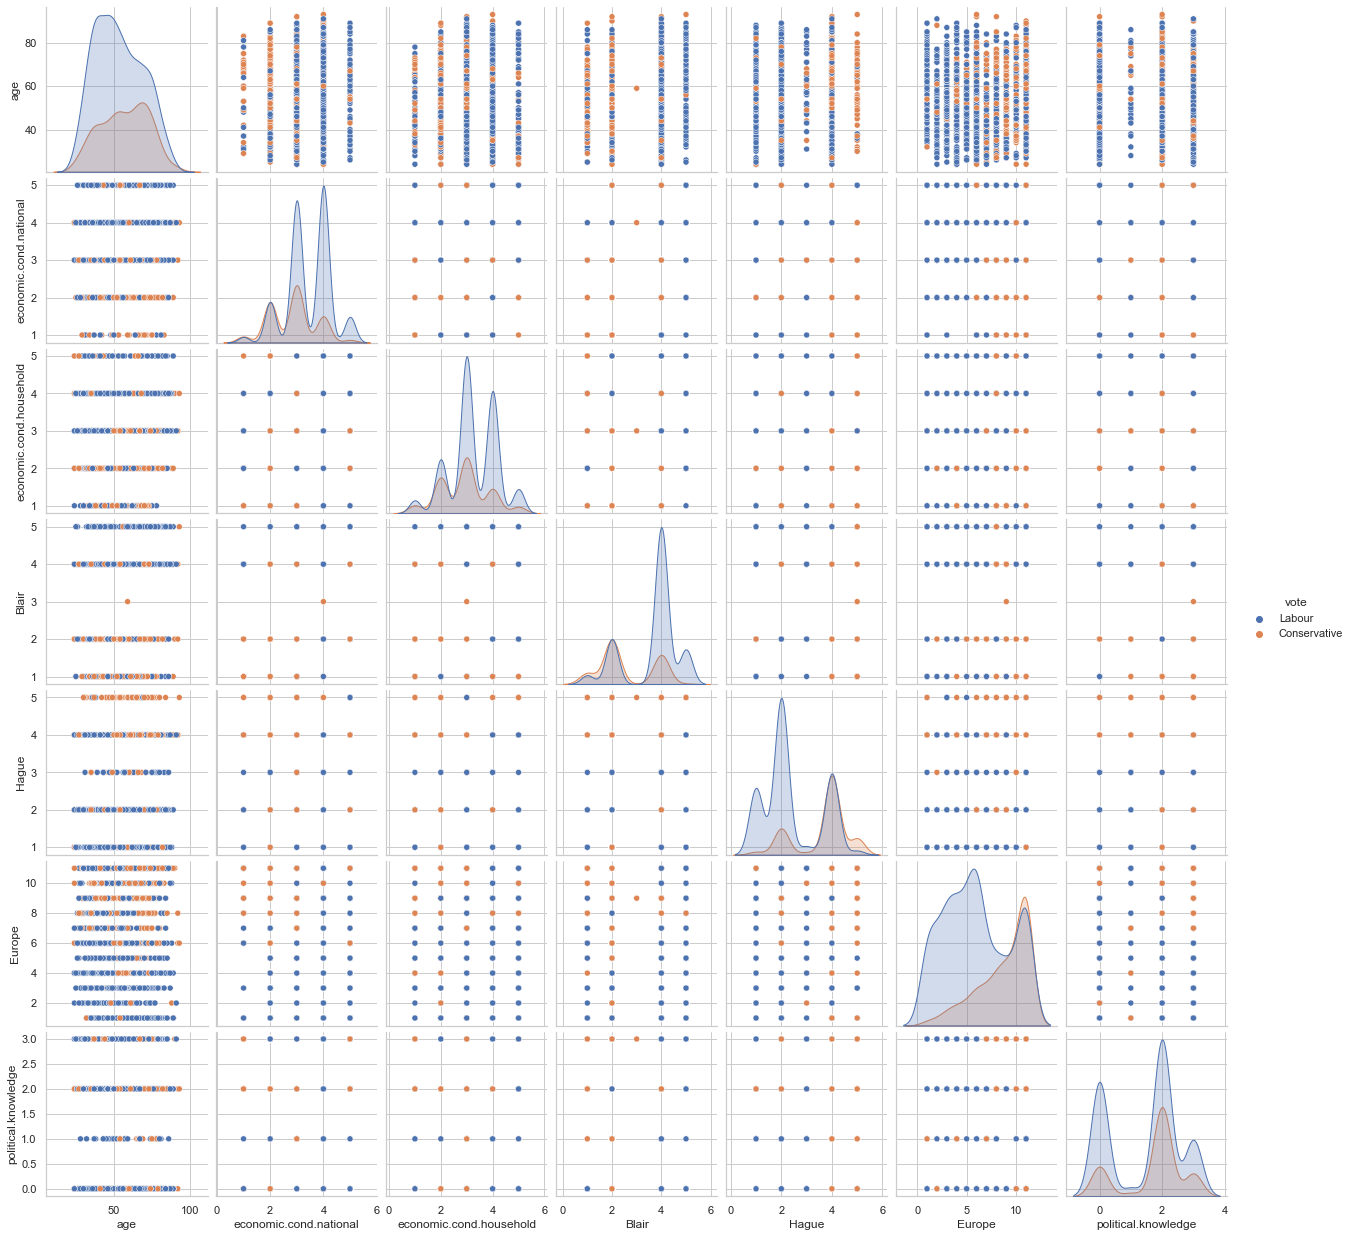

In [ ]:
sns.pairplot(data,hue="vote")

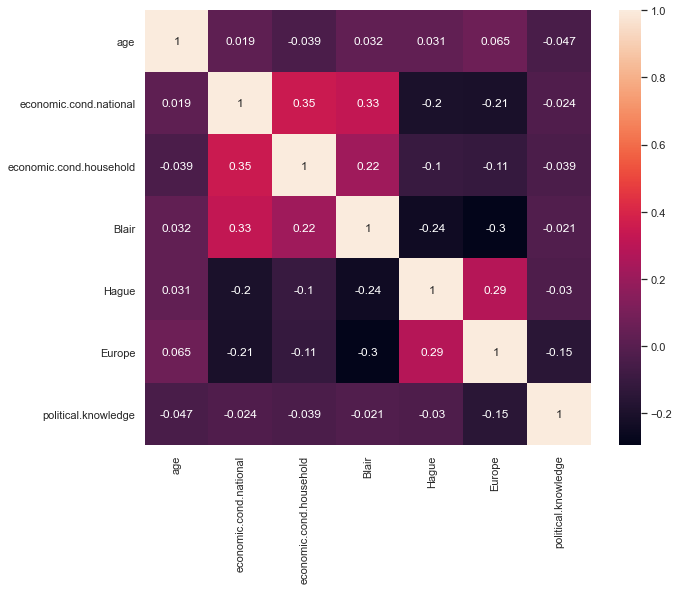

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
# checking for outliers

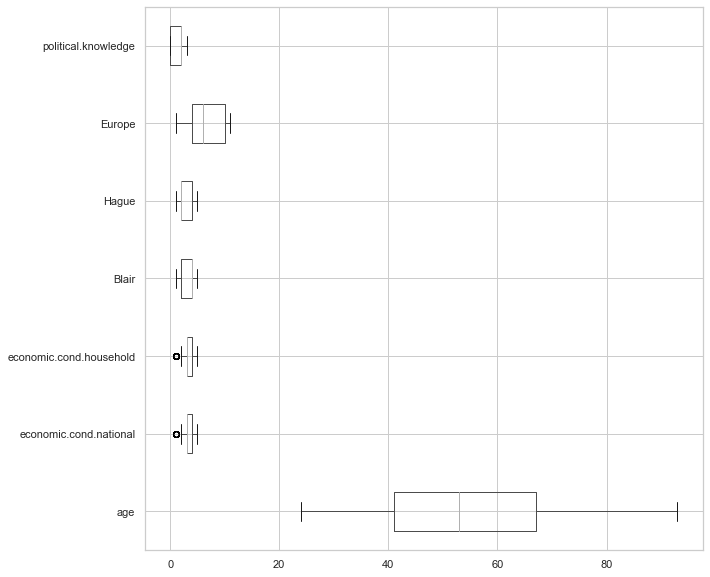

In [ ]:
plt.figure(figsize=(10,10))
data[num].boxplot(vert=0)
plt.show()

In [ ]:
## outlier treatment

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in data.iloc[:, 1:7].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

<AxesSubplot:>

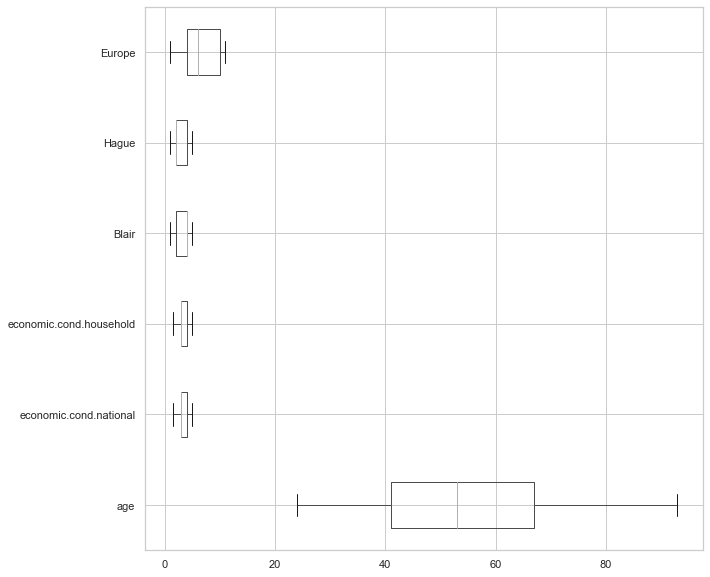

In [ ]:
plt.figure(figsize=(10,10))
data.iloc[:, 0:7].boxplot(vert=0)

 get_dummies of the object variables
Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity . This is done to ensure that we do not land in to dummy trap.

In [ ]:
df =pd.get_dummies(data, columns=cat,drop_first=True)

In [ ]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2,1,1


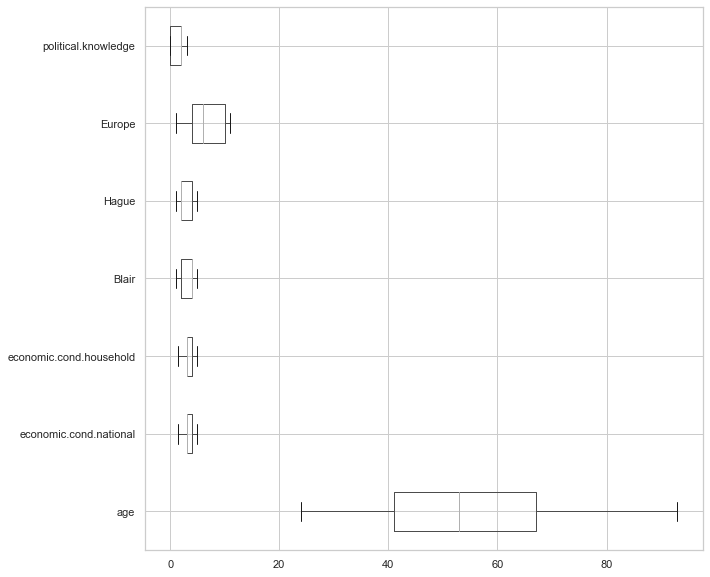

In [ ]:
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

## Scaling the variables as continuous variables have different weightage using min-max technique

In [ ]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [ ]:
df[num] = df[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [ ]:
## Check if the variables have been scaled or not
df.head(5)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,1,0
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1,1
2,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,1,0
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1,1


In [ ]:
df.dtypes

age                        float64
economic.cond.national     float64
economic.cond.household    float64
Blair                      float64
Hague                      float64
Europe                     float64
political.knowledge        float64
vote_Labour                  uint8
gender_male                  uint8
dtype: object

## Train-Test Split

In [ ]:
df.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.
y = df['vote_Labour']

In [ ]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1
2,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1


In [ ]:
y.head(25)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    0
24    0
Name: vote_Labour, dtype: uint8

In [ ]:
# Split X and y into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [ ]:
y_train.value_counts(1)

1    0.71065
0    0.28935
Name: vote_Labour, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.664474
0    0.335526
Name: vote_Labour, dtype: float64

In [ ]:
# Fit the model on original data i.e. before upsampling

model = LogisticRegression()

model.fit(X_train, y_train) #best fit s curve

y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8289473684210527
[[110  43]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



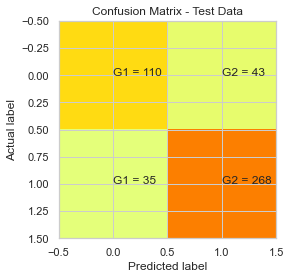

In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)

plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

s = [['G1', 'G2'], ['G1','G2']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

TN - 110 ; TP - 268 ; FP - 43 ; FN - 35

poor predictors => poor features .  we got recall 0f 88.

we can create new features by combining the given features to create strong features/predictors for a good model/ prediction using feature engineering

In [ ]:
# Accuracy - Training Data
model.score(X_train, y_train)




0.8350612629594723

In [ ]:
# AUC and ROC for the training data

AUC: 0.890


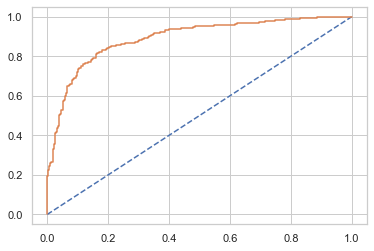

In [ ]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8289473684210527

In [ ]:
# AUC and ROC for the test data

AUC: 0.890


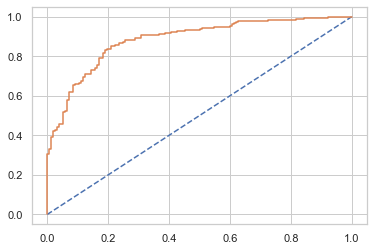

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import scale

In [ ]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

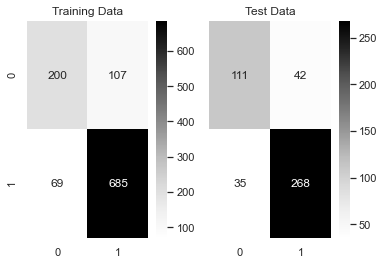

In [ ]:
# Training Data and Test Data Confusion Matrix Comparison

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
# Training Data and Test Data Classification Report Comparison

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [ ]:
# Probability prediction for the training and test data

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [ ]:
pred_prob_train[:,1]

array([0.04973366, 0.92243861, 0.69491333, ..., 0.77989739, 0.78940481,
       0.98130104])

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


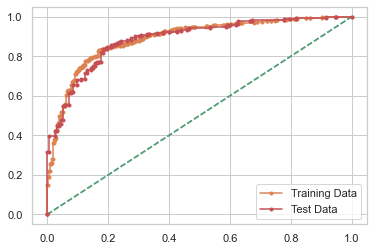

In [ ]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [ ]:
y_test.value_counts()

1    303
0    153
Name: vote_Labour, dtype: int64

In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[104  49]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



# KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8576814326107446
[[221  86]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       307
           1       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[108  45]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[105  48]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[108  45]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



# Comparison of Different Models


Interest Class is 1 i.e. Heart_Att = 1

Let's look at the performance of all the models on the Train Data set

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

Naive Bayes - Recall for class "1" is .15

             precision    recall  f1-score   support

       0       0.86      0.95      0.91      2698
       1       0.37      0.15      0.22       482

accuracy                           0.83      3180
macro avg 0.62 0.55 0.56 3180 weighted avg 0.79 0.83 0.80 3180

Linear Discriminant Analysis - Recall for class "1" is 0.06

            precision    recall  f1-score   support

       0       0.86      0.99      0.92      2698
       1       0.51      0.06      0.11       482

accuracy                           0.85      3180
macro avg 0.68 0.53 0.51 3180 weighted avg 0.80 0.85 0.80 3180

ADA Boosting - Recall for class "1" is 0.11

            precision    recall  f1-score   support

       0       0.86      0.99      0.92      2698
       1       0.72      0.11      0.19       482

accuracy                           0.86      3180
macro avg 0.79 0.55 0.56 3180 weighted avg 0.84 0.86 0.81 3180

Gradient Boosting - Recall for class "1" is 0.20

            precision    recall  f1-score   support

       0       0.87      1.00      0.93      2698
       1       0.97      0.20      0.32       482

accuracy                           0.88      3180
macro avg 0.92 0.60 0.63 3180 weighted avg 0.89 0.88 0.84 3180

KNN - Recall for class "1" is 0.17

         precision    recall  f1-score   support

       0       0.87      0.98      0.92      2698
       1       0.66      0.17      0.28       482

accuracy                           0.86      3180
macro avg 0.77 0.58 0.60 3180 weighted avg 0.84 0.86 0.83 3180

Decision Tree - Recall for class "1" is 1 (100%)

         precision    recall  f1-score   support

       0       1.00      1.00      1.00      2698
       1       1.00      1.00      1.00       482

accuracy                           1.00      3180
macro avg 1.00 1.00 1.00 3180 weighted avg 1.00 1.00 1.00 3180

Random Forest - Recall for class "1" is 1 (100%)

         precision    recall  f1-score   support

       0       1.00      1.00      1.00      2698
       1       1.00      1.00      1.00       482

accuracy                           1.00      3180
macro avg 1.00 1.00 1.00 3180 weighted avg 1.00 1.00 1.00 3180

Bagging - Recall for class "1" is 1 (100%)

             precision    recall  f1-score   support

       0       1.00      1.00      1.00      2698
       1       1.00      1.00      1.00       482

accuracy                           1.00      3180
macro avg 1.00 1.00 1.00 3180 weighted avg 1.00 1.00 1.00 3180

So as per the train data, Worst performing models are - Linear Discriminant Analysis Best Performing models are - Decision Tree , Random Forest and Bagging

However are these best performing models overfitted..

Let's look at the performance on the test data set

Recall on the Test Data Set

Naive Bayes - Recall for class "1" is .17

          precision    recall  f1-score   support

       0       0.86      0.95      0.91       898
       1       0.38      0.17      0.24       162

accuracy                           0.83      1060
macro avg 0.62 0.56 0.57 1060 weighted avg 0.79 0.83 0.80 1060

Linear Discriminant Analysis - Recall for class "1" is 0.08

             precision    recall  f1-score   support

       0       0.86      0.99      0.92       898
       1       0.59      0.08      0.14       162

accuracy                           0.85      1060
macro avg 0.72 0.54 0.53 1060 weighted avg 0.82 0.85 0.80 1060

ADA Bossting - Recall for class "1" is 0.07

            precision    recall  f1-score   support

       0       0.85      0.99      0.92       898
       1       0.55      0.07      0.12       162

accuracy                           0.85      1060
macro avg 0.70 0.53 0.52 1060 weighted avg 0.81 0.85 0.80 1060

Gradient Boosting - Recall for class "1" is 0.7

            precision    recall  f1-score   support

       0       0.85      0.99      0.92       898
       1       0.50      0.07      0.12       162

accuracy                           0.85      1060
macro avg 0.68 0.53 0.52 1060 weighted avg 0.80 0.85 0.79 1060

KNN - Recall for class "1" is 0.06

             precision    recall  f1-score   support

       0       0.85      0.97      0.91       898
       1       0.26      0.06      0.09       162

accuracy                           0.83      1060
macro avg 0.56 0.51 0.50 1060 weighted avg 0.76 0.83 0.78 1060

Decision Tree - Recall for class "1" is .25

             precision    recall  f1-score   support

       0       0.87      0.85      0.86       898
       1       0.26      0.28      0.27       162

accuracy                           0.77      1060
macro avg 0.56 0.57 0.56 1060 weighted avg 0.77 0.77 0.77 1060

Random Forest - Recall for class "1" is .06

             precision    recall  f1-score   support

       0       0.85      0.99      0.92       898
       1       0.48      0.06      0.11       162

accuracy                           0.85      1060
macro avg 0.66 0.52 0.51 1060 weighted avg 0.80 0.85 0.79 1060

Bagging - Recall for class "1" is .12

             precision    recall  f1-score   support

       0       0.85      0.98      0.91       898
       1       0.36      0.07      0.12       162

accuracy                           0.84      1060
macro avg 0.61 0.53 0.52 1060 weighted avg 0.78 0.84 0.79 1060

Model which have not performed well on the train data set , also have not performed well on the test data set However Decision Tree ,Random Forest and Bagging which had a 100% score on the train data set have shown a poor result on the test data set .. Hence a clear case of overfitting.

Conclusion
So we will select models which have performed approximately similar on the train and test data set and apply smote on the same to check if the performance has improved or not i.e. Naive Bayes and KNN

# model tuning

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [ ]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [ ]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.419647,0.580353
1,0.170498,0.829502
2,0.009368,0.990632
3,0.808850,0.191150
4,0.080693,0.919307


              precision    recall  f1-score   support

           0       0.76      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 



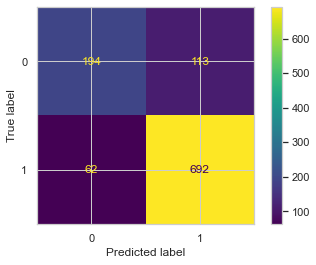

In [ ]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456
 



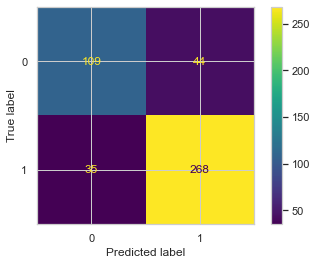

In [ ]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

# SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# SMOTE is only applied on the train data set

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
## Let's check the shape after SMOTE
X_train_res.shape


(1508, 8)

# Naive Bayes with SMOTE

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8262599469496021
[[622 132]
 [130 624]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       754
           1       0.83      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8092105263157895
[[125  28]
 [ 59 244]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.82      0.81      0.81       456



# KNN With SMOTE

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8859416445623343
[[713  41]
 [131 623]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       754
           1       0.94      0.83      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8070175438596491
[[125  28]
 [ 60 243]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



# Conclusion after SMOTE

Recall for Class 1

                    Train Data Set                  Test Data Set
Naive Bayes .53 .54 KNN .99 .52

Recall for Naive Bayes increased significantly. Huge Difference between the train and test dataset Recall value for KNN .

SMOTE as a technique is generally applied if minority class is below 5%.

Readers are advised to perform SMOTE on other models as well to compare the result



# Cross Validation on Naive Bayes Model

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.8013245 , 0.82119205, 0.82781457, 0.76821192, 0.86092715,
       0.86754967, 0.76821192, 0.85430464, 0.80666667, 0.85333333])

In [ ]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.76086957, 0.80434783, 0.89130435, 0.80434783, 0.86956522,
       0.86956522, 0.88888889, 0.84444444, 0.75555556, 0.82222222])

In [ ]:
scores = cross_val_score(KNN_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.78807947, 0.86754967, 0.80794702, 0.80794702, 0.86754967,
       0.91390728, 0.8410596 , 0.88741722, 0.82      , 0.85333333])

In [ ]:
scores = cross_val_score(KNN_SM_model, X_test, y_test, cv=10)
scores

array([0.73913043, 0.7826087 , 0.86956522, 0.80434783, 0.89130435,
       0.80434783, 0.82222222, 0.82222222, 0.77777778, 0.8       ])